# ANLY590 HW1
## Jun Wang
## 10/14/2018

## Problem 1
### Part 1
<img src="prob1part1.jpeg">
### Part 2
<img src="prob1part2.jpeg">
### Part 3

In [77]:
import numpy as np 
import pandas as pd
# Define ReLu and softmax function
def relu(x):
    return np.maximum(x,0)

def softmax(x):
    return np.exp(x)/(np.exp(x).sum(axis=0, keepdims=True))

def ff_nn_2_ReLu(x,W1,W2,W3,b1,b2,b3):
    a_1 = np.dot(W1,x) + b1
    h1 = relu(a_1)
    a_2 = np.dot(W2,h1) + b2
    h2 = relu(a_2)
    a_3 = np.dot(W3,h2) + b3
    y = softmax(a_3)
    return y

### Part4

In [78]:
x = np.array([[1,0,0],[-1,-1,1]])
W1 = np.array([[1,0],[-1,0],[0,.5]])
W2 = np.array([[1,0,0],[-1,-1,0]])
W3 = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0],[0],[1]])
b2 = np.array([[1],[-1]])
b3 = np.array([[1],[0],[0]])
y = ff_nn_2_ReLu(x,W1,W2,W3,b1,b2,b3)
print(y)

[[0.94649912 0.84379473 0.84379473]
 [0.04712342 0.1141952  0.1141952 ]
 [0.00637746 0.04201007 0.04201007]]


For each $x_i$, the probability of $x_i$ in class j is $(i,j)^{th}$ term in the matrix. For 1 $\leq$ i $\leq$ n, 1$\leq$ j $\leq$ m, where n is number of samples (number of columns in x) and m is number of class whose index starts at 1. Therefore, for this input, all $x_1,x_2,x_3$ will be calssified in class 1 (assuming start with index 0).

## Problem 2
### Part 1
function:<br>
$f(x,y)=f(x, y) = (1 − x)^2 + 100(y − x^2)^2$<br><br>
Partial derivative respect to $x$:<br>
$\frac{\partial f(x,y)}{\partial x} = -2(1-x) + 200(y-x^2)(-2x) = 2x-2 -400x(y-x^2) = 2x - 2 - 400(xy-x^3)$<br><br>
Partial derivative respect to $y$:<br>
$\frac{\partial f(x,y)}{\partial y} = 2*100(y-x^2)=200(y-x^2)$
### Part 2

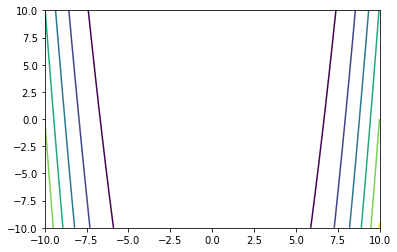

In [79]:
import matplotlib.pyplot as plt
import numpy as np

rosenbrockfunction = lambda x,y: (1-x)**2+100*(y-x**2)**2
X,Y = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
Z = rosenbrockfunction(X,Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
plt.show()

### Part 3

In [80]:
def grad_f(vector):
    x, y = vector
    df_dx = 2.*(200.*x*x*x - 200.*x*y + x - 1.)
    df_dy = 200.*(y - x*x)
    return np.array([df_dx, df_dy])


def grad_descent(starting_point=None, iterations=10, learning_rate=0.001):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


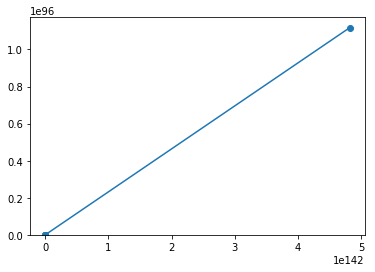

In [81]:
#learning rate of 12
np.random.seed(10)
traj = grad_descent(iterations=50,learning_rate=12)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


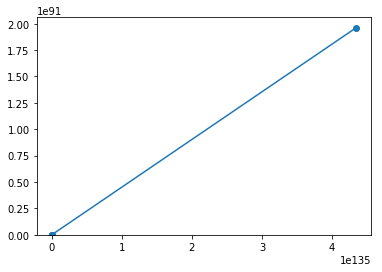

In [82]:
#learning rate of 8
np.random.seed(10)
traj = grad_descent(iterations=50,learning_rate=8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


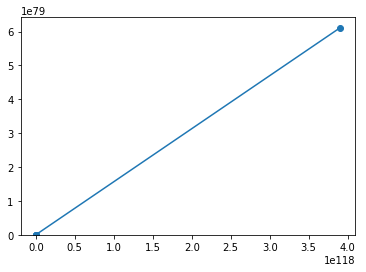

In [83]:
#learning rate of 3
np.random.seed(10)
traj = grad_descent(iterations=50,learning_rate=3)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

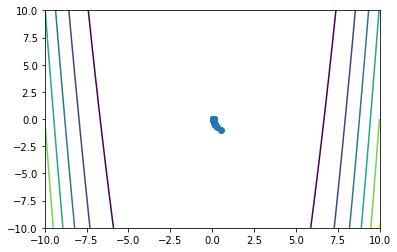

In [85]:
#learning rate of 0.001
np.random.seed(10)
traj = grad_descent(iterations=50,learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

This function is not convex and the minimum point is at (-1,-1). Based on the first three plots above, when the learning rate is large, it would miss the optimal and the trajectories diverage. For the last plot, when learning rate is small, it takes each step very small and but might need more iterations to find the optimal.

### Part 4

In [86]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-5,5,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    print('Initial point is',point)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    print('After iterations, the point is ',point)
    return np.array(trajectory)

Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [nan nan]


/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/FrankWang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


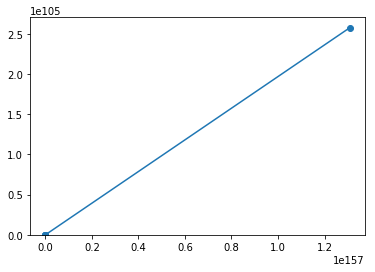

In [87]:
#1
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=2, alpha=.7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [2.43522431 5.30054024]


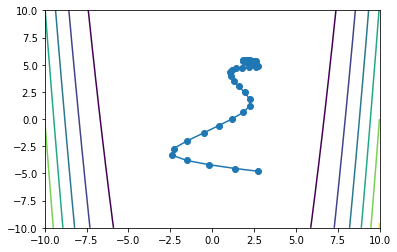

In [88]:
#2
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.0001, alpha=.9)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [ 0.01728048 -0.06314912]


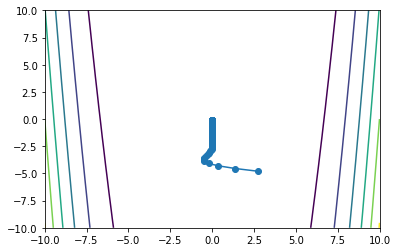

In [89]:
#3
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=0.0001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

Based on the plots above, we can see that larger epsilon makes the algorithm skip the optimal and diverage. While, small epsilon makes it more stable and need more iterations to reach optimal.

## Problem 3
### Part 1
Based on problem1, we have:<br>
$z_1=w_1x+b_1$, $h_1=f(z_1)$, where f is the ReLU function.<br>
$z_2=w_2h_1+b_2$, $h_2=f(z_2)$<br>
$a=w_3h_2+b_3$, $\hat{y}=g(a)$, where g is the softmax function.<br>
Then the loss function woule be:<br> 
$L(y,\hat{y} )=y_1log(\hat{y_1})+y_2log(\hat{y_2})+y_3log(\hat{y_3})$<br><br>
Take gradient with respect to each parameters, we have:<br>
$$\frac{\partial{L}}{\partial{b_3}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{a}}\frac{\partial{a}}{\partial{b_3}}=\hat{y}−y$$<br>
$$\frac{\partial{L}}{\partial{w_3}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{a}}\frac{\partial{a}}{\partial{w_3}}=(\hat{y}-y)h_2$$<br>
$$\frac{\partial{L}}{\partial{b_2}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{a}}\frac{\partial{a}}{\partial{h_2}}\frac{\partial{h_2}}{\partial{z_2}}\frac{\partial{z_2}}{\partial{b_2}}=(\hat{y}−y)*w_3*\mathbb{1}(z_2>0)$$<br>
$$\frac{\partial{L}}{\partial{w_2}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{a}}\frac{\partial{a}}{\partial{h_2}}\frac{\partial{h_2}}{\partial{z_2}}\frac{\partial{z_2}}{\partial{w_2}}=(\hat{y}−y)*w_3*\mathbb{1}(z_2>0)*h_1$$<br>
$$\frac{\partial{L}}{\partial{b_1}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{a}}\frac{\partial{a}}{\partial{h_2}}\frac{\partial{h_2}}{\partial{z_2}}\frac{\partial{z_2}}{\partial{h_1}}\frac{\partial{h_1}}{\partial{z_1}}\frac{\partial{z_1}}{\partial{b_1}}=(\hat{y}−y)*w_3*\mathbb{1}(z_2>0)*w_2*\mathbb{1}(z_1>0)$$<br>
$$\frac{\partial{L}}{\partial{w_1}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{a}}\frac{\partial{a}}{\partial{h_2}}\frac{\partial{h_2}}{\partial{z_2}}\frac{\partial{z_2}}{\partial{h_1}}\frac{\partial{h_1}}{\partial{z_1}}\frac{\partial{z_1}}{\partial{w_1}}=(\hat{y}−y)*w_3*\mathbb{1}(z_2>0)*w_2*\mathbb{1}(z_1>0)*x$$

### Part 2

In [90]:
def grad_f(X,H1,H2,Y,Y_hat,parameters):    
    W1,b1,W2,b2,W3,b3 = parameters
    
    dW3 = np.dot((Y_hat - Y).T,H2)
    db3 = np.reshape((Y_hat - Y).sum(axis=0),(3,1))
    db2 = np.reshape((np.dot((Y_hat - Y),W3)* (H2 > 0)).sum(axis = 0),(2,1))
    dW2 = np.dot((np.dot((Y_hat - Y),W3)* (H2 > 0)).T,H1)
    db1 = np.reshape(np.sum(np.dot(np.dot((Y_hat - Y),W3)* (H2 > 0),W2)*(H1>0),axis = 0),(3,1))
    dW1 = np.dot((np.dot(np.dot((Y_hat - Y),W3)* (H2 > 0),W2)*(H1>0)).T,X)
    
    return [dW1,db1,dW2,db2,dW3,db3]

### Part 3

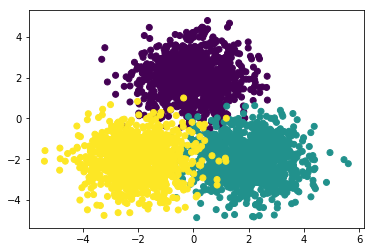

In [91]:
covm = [[1, 0], [0, 1]] 
x = np.concatenate((np.random.multivariate_normal(mean = [0, 2], cov=covm, size = 1000),
                   np.random.multivariate_normal(mean = [2,-2], cov=covm, size =1000),
                   np.random.multivariate_normal(mean = [-2, -2], cov=covm, size =1000)))
y = np.zeros(3000)
y[1000:2000] = 1
y[2000:3000] = 2
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

### Part 4

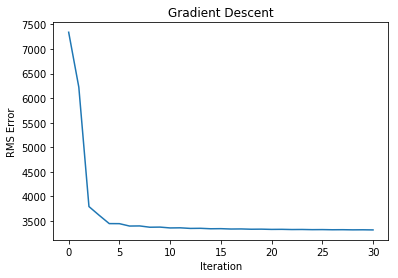

In [99]:
Y = pd.Series(y)
Y = pd.get_dummies(Y).as_matrix()
X = x

W1 = np.array([[1,0],[-1,0],[0,.5]])
W2 = np.array([[1,0,0],[-1,-1,0]])
W3 = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0],[0],[1]])
b2 = np.array([[1],[-1]])
b3 = np.array([[1],[0],[0]])

ReLu = np.vectorize(lambda z: np.fmax(0,z))
softmax = lambda z: np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def predict(Y_hat):
    return np.argmax(Y_hat, axis=1)

def loss(y, y_hat):
    tot = y * np.log(y_hat)
    return -tot.sum()

def forward(X,parameters): 
    W1,b1,W2,b2,W3,b3 = parameters
    a1 = np.dot(x,W1.T) +b1.T
    H1 = ReLu(a1)
    a2 = np.dot(H1,W2.T) + b2.T
    H2 = ReLu(a2)
    a3 = np.dot(H2,W3.T) + b3.T
    Y_hat = softmax(a3)
    return H1,H2,Y_hat

def grad_descent(x, y, parameters, iterations=10, learning_rate=1e-2):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(X,point)[2])]
    
    for i in range(iterations):
        H1,H2,Y_hat = forward(x,point)
        grad = grad_f(x,H1,H2, y,Y_hat,point)
        point = np.subtract(point, [i*learning_rate for i in grad])
        trajectory.append(point)
        losses.append(loss(y,forward(X,point)[2]))
    return (np.array(trajectory), losses)

parameters = [W1,b1,W2,b2,W3,b3]

traj, losses = grad_descent(X,Y,parameters,iterations=30,learning_rate=2e-3)

plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")
plt.title("Gradient Descent")
plt.show()

### Part 5

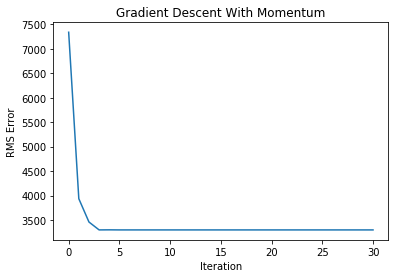

In [100]:
def grad_descent_with_momentum(x, y, parameters, iterations=10, alpha=.9, epsilon=0.001):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(X,point)[2])]
    v = [np.zeros(np.shape(i)) for i in parameters]
    
    for i in range(iterations):
        H1,H2,Y_hat = forward(x,point)
        grad = grad_f(x,H1,H2, y,Y_hat,point)
        v = np.add([alpha*i for i in v], [i*epsilon for i in grad])
        point = point - v
        trajectory.append(point)
        losses.append(loss(y,forward(X,point)[2]))
    return (np.array(trajectory), losses)

traj, losses = grad_descent_with_momentum(X,Y,parameters,iterations=30,alpha=.1,epsilon = 0.001)


plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")
plt.title("Gradient Descent With Momentum")
plt.show()

With this set of points, based on the two plots above, gradient descent and momentum gradient descent have similar rate of convergence with momentum has slitly better performance. For the tuning parameters (learning rate for gradient and epsilon for momentum gradient), a smaller tuning parameter would have a smaller step at each iteration and have a slower rate of convergence.